<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4210_202420_ADL/blob/main/Talleres/Taller%203/MINE4210_ADL2024_Taller3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo ADL](https://github.com/fcastellanosp/MINE-4210_202420_ADL/blob/main/Laboratorios/logo_adl.png?raw=true)

# **Taller 3**

- **Integrante 1:**
- **Integrante 2:**

La universidad de los Andes ha evidenciado que nos es ajena a la situación presentada por inteligencia artificial. Chat GPT ha tomado fuerza en los últimos años y su uso ético viene generando preocupación, no sólo para la Universidad, sino para la comunidad académica en general.

Por esta razón, mediante la red Social X, fue generado el debate de las implicaciones de Chat GPT no sólo en el ámbito académico, sino en la vida diaria.

Como un **primer** ejercicio de acercamiento para la percepción de la comunidad en redes sociales, ha sido etiquetada la información acerca de de las opiniones, catalogando como un análisis de polaridad o de sentimientos, clasificando la información como positivo, negativo o neutro. De esta forma fueron presentados los primeros resultados con el modelo base, junto con la ayuda de Glove.

Ahora bien, como **nuevo objetivo** tomaremos los modelos presentados y realizaremos los ajustes necesarios en la búsqueda de mejores resultados.

De esta forma la Universidad tomará esta información como punto de partida para evaluación de acciones a futuro.

Toda la información ha sido consolidada en el siguiente [enlace](https://www.kaggle.com/datasets/evilspirit05/tweet-gpt).

# **Preguntas:**

1.   Construir una red neuronal optimizada para el modelo base con los ajustes que considere necesarios en el procesamiento de la información y/o arquitectura de la red.

2. Construir una red neuronal optimizada apoyada con Glove con los ajustes que considere necesarios en el procesamiento de la información y/o arquitectura de la red.

3.  Realizar la búsqueda de hiperparámetros para ambos casos.

4. Generar una tabla comparativa de los resultados obtenidos.

# **Notas Importantes:**
- El proceso propuesto debe estar debidamente codificado y justificado en cada una de las decisiones tomadas.
- La propuesta realizada es propia de cada grupo, no deben generarse procesos iguales con otros grupos de trabajo.
- No es necesario repetir el código implementado en la primera versión, debes trabajar en las mejoras/optimizaciones específicamente.
- El archivo a presentar debe ser en formato .ipynb o HTML ya ejecutado. Celda que no esté ejecutada no se podrá evaluar.
- El nombre del archivo debe ser `Taller_3_{Apellido_Nombre}_{Apellido_Nombre}` de cada integrante respectivamente.

# 1. Instalación e Importación de librerías

In [2]:
!pip install keras-tuner
!pip install contractions
!pip install num2words
!pip install ydata-profiling
#Modelo preentrenado
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 10.0 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=b62b3a79c5e86b90227b673f9be45c83a48fb22d11c9e690fe8f261038129d79
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 12.3 MB/s

In [3]:
import pandas as pd
import numpy as np

import os
import os.path as osp


from ydata_profiling import ProfileReport
from ydata_profiling.config import Config
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

import contractions
import unicodedata, re
import num2words
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Descargar los recursos necesarios para lematización y stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
STOPWORDS = set(stopwords.words('english'))

import tensorflow as tf
import keras_tuner as kt



from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, LSTM, TextVectorization, Embedding, Bidirectional, GRU
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.initializers import Constant
from keras.callbacks import ModelCheckpoint


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.regularizers import l2

print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

# Cargar archivos en Colab
from google.colab import drive

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Tensorflow version: 2.17.0
Keras version: 3.4.1


#2. Datos

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls -lha /content/drive/MyDrive/Colab_Notebooks/ADL_20242/Talleres/Taller_3/
!mkdir -p /root/.kaggle
!cp /content/drive/MyDrive/Colab_Notebooks/ADL_20242/Talleres/Taller_3/kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

total 3.0G
-rw------- 1 root root 332M Aug  4  2014 glove.6B.100d.txt
-rw------- 1 root root 662M Aug  4  2014 glove.6B.200d.txt
-rw------- 1 root root 990M Aug 27  2014 glove.6B.300d.txt
-rw------- 1 root root 164M Aug  4  2014 glove.6B.50d.txt
-rw------- 1 root root 823M Oct 25  2015 glove.6B.zip
drwx------ 2 root root 4.0K Oct 26 20:02 hyperparameter_tuning
-rw------- 1 root root   63 Oct 20 03:18 kaggle.json
-rw------- 1 root root 3.0M Oct 27 20:40 Taller3.ipynb
-rw------- 1 root root 2.9M Oct 28 01:09 Taller3_v2.ipynb
-rw------- 1 root root 2.9M Oct 28 03:34 Taller3_v3.ipynb
drwx------ 2 root root 4.0K Oct 23 04:26 tweet-gpt
-rw------- 1 root root 9.6M Aug  4 08:11 tweet-gpt.zip


In [ ]:
!kaggle datasets download evilspirit05/tweet-gpt -p /content/drive/MyDrive/Colab_Notebooks/ADL_20242/Talleres/Taller_3/

Dataset URL: https://www.kaggle.com/datasets/evilspirit05/tweet-gpt
License(s): MIT
 52% 5.00M/9.54M [00:00<00:00, 46.8MB/s]
100% 9.54M/9.54M [00:00<00:00, 49.1MB/s]


In [6]:
# Definir las variables
ROOT_DIR = '/content/drive/MyDrive/Colab_Notebooks/ADL_20242/Talleres/Taller_3/'
DATASET_NAME = 'tweet-gpt'
SUB_DATASET_NAME = 'tweet_gpt'

# Cambiar directorio al lugar donde se descargó el archivo
%cd {ROOT_DIR}

/content/drive/MyDrive/Colab_Notebooks/ADL_20242/Talleres/Taller_3


In [ ]:
%cd {ROOT_DIR}
!mkdir /{DATASET_NAME}
!unzip {DATASET_NAME}.zip -d {ROOT_DIR}/{DATASET_NAME}

In [7]:
DATA_DIR = f"{ROOT_DIR}/{DATASET_NAME}"
print(DATA_DIR)
DATA_PATH = f"{DATA_DIR}/{SUB_DATASET_NAME}.csv"
print(DATA_PATH)

/content/drive/MyDrive/Colab_Notebooks/ADL_20242/Talleres/Taller_3//tweet-gpt
/content/drive/MyDrive/Colab_Notebooks/ADL_20242/Talleres/Taller_3//tweet-gpt/tweet_gpt.csv


In [8]:
data = pd.read_csv(DATA_PATH)
data.head(10)

,Date,Tweet,Url,User,UserCreated,UserVerified,UserFollowers,UserFriends,Retweets,Likes,...,New_Date,Time,Hour,Day,TweetStr,hashtags,clean_tweet,sentiment_label,sentiment_score,sentiment
0,2023-04-08 03:31:08+00:00,OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...,https://twitter.com/tubeblogger/status/1644543...,tubeblogger,2013-06-25 01:42:59+00:00,False,312.0,293.0,0.0,0,...,2023-04-08,03:31:08,3,Saturday,OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...,"['ai', 'ChatGPT']",openai’s gpt4 just got supercharged!,-,0.917779,positive
1,2023-04-08 03:30:51+00:00,"""Classical art"" is struggling - not changed th...",https://twitter.com/majorradic/status/16445432...,majorradic,2011-12-12 01:29:15+00:00,False,522.0,684.0,0.0,2,...,2023-04-08,03:30:51,3,Saturday,"""Classical art"" is struggling - not changed th...","['ChatGPT', 'chatgpt3', 'AIArtwork', 'AI', 'AI...","classical art"" is struggling not changed the ...",-,0.515711,neutral
2,2023-04-08 03:30:00+00:00,Alibaba invites businesses to trial 'ChatGPT r...,https://twitter.com/gadgetsnow/status/16445430...,gadgetsnow,2010-07-29 10:32:28+00:00,True,90392.0,56.0,0.0,0,...,2023-04-08,03:30:00,3,Saturday,Alibaba invites businesses to trial 'ChatGPT r...,"['Alibaba', 'ChatGPT']",alibaba invites businesses to trial chatgpt ri...,-,0.924410,neutral
3,2023-04-08 03:28:59+00:00,Trying to stop students from using #AI and #ch...,https://twitter.com/Sherab_Taye/status/1644542...,Sherab_Taye,2010-05-10 12:40:40+00:00,False,338.0,53.0,0.0,0,...,2023-04-08,03:28:59,3,Saturday,Trying to stop students from using #AI and #ch...,"['AI', 'chatGPT']",trying to stop students from using and is like...,-,0.636237,negative
4,2023-04-08 03:28:31+00:00,I Asked ChatGPT's AI Chatbot How Can I Earn Cr...,https://twitter.com/cryptoccentral/status/1644...,cryptoccentral,2023-01-27 00:12:12+00:00,False,1.0,2.0,0.0,2,...,2023-04-08,03:28:31,3,Saturday,I Asked ChatGPT's AI Chatbot How Can I Earn Cr...,"['crypto', 'bitcoin', 'cryptocurrency', 'ai', ...",i asked chatgpts ai chatbot how can i earn cry...,-,0.916693,neutral
5,2023-04-08 03:26:16+00:00,Gugenka team has created a fun Customize new p...,https://twitter.com/kiradragonp/status/1644542...,kiradragonp,2010-07-03 19:13:52+00:00,False,895.0,635.0,0.0,1,...,2023-04-08,03:26:16,3,Saturday,Gugenka team has created a fun Customize new p...,"['ChatGPT', 'Hubs', 'MozillaHubs', 'webvr', 'x...",gugenka team has created a fun customize new p...,-,0.824792,positive
6,2023-04-08 03:23:05+00:00,https://t.co/cDAXMevBtr\nThe race to develop #...,https://twitter.com/CDOTrends/status/164454134...,CDOTrends,2018-03-10 10:19:45+00:00,False,1051.0,2439.0,0.0,1,...,2023-04-08,03:23:05,3,Saturday,https://t.co/cDAXMevBtr\nThe race to develop #...,"['AI', 'tech', 'ChatGPT', 'CDOTrends', 'Databr...",the race to develop models with instructionfol...,-,0.647254,neutral
7,2023-04-08 03:22:50+00:00,Took ~90 minutes but I convinced #ChatGPT that...,https://twitter.com/tctimmeh/status/1644541282...,tctimmeh,2012-01-07 19:51:51+00:00,False,300.0,415.0,0.0,1,...,2023-04-08,03:22:50,3,Saturday,Took ~90 minutes but I convinced #ChatGPT that...,['ChatGPT'],took ~90 minutes but i convinced that theres n...,-,0.372271,positive
8,2023-04-08 03:22:03+00:00,"Share tweets with my free chat GPT, Telegram b...",https://twitter.com/xTweetsio/status/164454108...,xTweetsio,2023-03-12 17:42:58+00:00,False,2053.0,6.0,0.0,1,...,2023-04-08,03:22:03,3,Saturday,"Share tweets with my free chat GPT, Telegram b...","['chatGPT', 'tweets', 'AI', 'free', 'Twitterbot']","share tweets with my free chat gpt, telegram b...",-,0.929390,positive
9,2023-04-08 03:22:03+00:00,🚀 Discover the power of #ChatGPT with our begi...,https://twitter.com/yuhanito/status/1644541085...,yuhanito,2022-08-07 09:26:32+00:00,False,39.0,50.0,0.0,0,...,2023-04-08,03:22:03,3,Saturday,🚀 Discover the power of #ChatGPT with our begi...,"['ChatGPT', 'AI', 'DigitalTransformation']",discover the power of with our beginnerfriendl...,-,0.921280,positiv

In [9]:
MY_SEED = 42 #Semilla para reproducibilidad
#Campos del archivo de texto para involucrar en el proceso
SENTIMENT_FIELD = "sentiment"
TEXT_FIELD = "Tweet"

In [10]:
data[SENTIMENT_FIELD].value_counts()

,count
sentiment,
neutral,19218
positive,11705
negative,6537


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37460 entries, 0 to 37459
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             37460 non-null  object 
 1   Tweet            37460 non-null  object 
 2   Url              37460 non-null  object 
 3   User             37460 non-null  object 
 4   UserCreated      37460 non-null  object 
 5   UserVerified     37460 non-null  bool   
 6   UserFollowers    37460 non-null  float64
 7   UserFriends      37460 non-null  float64
 8   Retweets         37460 non-null  float64
 9   Likes            37460 non-null  int64  
 10  Location         37460 non-null  object 
 11  Description      37460 non-null  object 
 12  New_Date         37460 non-null  object 
 13  Time             37460 non-null  object 
 14  Hour             37460 non-null  int64  
 15  Day              37460 non-null  object 
 16  TweetStr         37460 non-null  object 
 17  hashtags    

In [12]:
# Dividir los datos en entrenamiento y prueba con estratificación
train, test = train_test_split(data, test_size=0.2, stratify=data[SENTIMENT_FIELD], random_state=MY_SEED, shuffle=True)

# Dividir el conjunto de entrenamiento en entrenamiento y validación con estratificación
train, val = train_test_split(train, test_size=0.2, stratify=train[SENTIMENT_FIELD], random_state=MY_SEED, shuffle=True)

print("Tamaño de datos de entrenamiento:", train.shape)
print("Tamaño de datos de validación:", val.shape)
print("Tamaño de datos de prueba:", test.shape)
train

Tamaño de datos de entrenamiento: (23974, 22)
Tamaño de datos de validación: (5994, 22)
Tamaño de datos de prueba: (7492, 22)


,Date,Tweet,Url,User,UserCreated,UserVerified,UserFollowers,UserFriends,Retweets,Likes,...,New_Date,Time,Hour,Day,TweetStr,hashtags,clean_tweet,sentiment_label,sentiment_score,sentiment
8010,2023-04-05 12:11:47+00:00,Every generation mistakenly thinks theirs will...,https://twitter.com/showprogress/status/164358...,showprogress,2022-11-15 19:40:52+00:00,False,167.0,511.0,0.0,0,...,2023-04-05,12:11:47,12,Wednesday,Every generation mistakenly thinks theirs will...,"['artificialintelligence', 'openai', 'ai', 'ch...",every generation mistakenly thinks theirs will...,-,0.780657,negative
30863,2023-03-29 15:12:36+00:00,"Introducing the innovative #Room22 project, wh...",https://twitter.com/rocstar22_/status/16410960...,rocstar22_,2019-05-09 22:47:38+00:00,False,2702.0,704.0,13.0,19,...,2023-03-29,15:12:36,15,Wednesday,"Introducing the innovative #Room22 project, wh...","['Room22', 'NFT', 'chatgpt']","introducing the innovative project, where owni...",-,0.956751,positive
21970,2023-03-31 19:32:09+00:00,Italy bans #ChatGPT - interesting move!\nhttps...,https://twitter.com/TomFWater/status/164188611...,TomFWater,2011-07-15 11:27:58+00:00,False,2842.0,1739.0,0.0,0,...,2023-03-31,19:32:09,19,Friday,Italy bans #ChatGPT - interesting move!\nhttps...,['ChatGPT'],italy bans interesting move!,-,0.851772,positive
15743,2023-04-03 02:14:49+00:00,"Here's another learning angle, this time havin...",https://twitter.com/synthscript/status/1642712...,synthscript,2010-04-16 00:20:24+00:00,False,107.0,202.0,0.0,3,...,2023-04-03,02:14:49,2,Monday,"Here's another learning angle, this time havin...",['ChatGPT'],"heres another learning angle, this time having...",-,0.523667,negative
8006,2023-04-05 12:14:24+00:00,Wow! It's been a week and I've never felt safe...,https://twitter.com/ludovigna/status/164358789...,ludovigna,2012-07-24 18:30:48+00:00,False,372.0,1558.0,0.0,0,...,2023-04-05,12:14:24,12,Wednesday,Wow! It's been a week and I've never felt safe...,['ChatGPT'],wow! its been a week and ive never felt safer ...,-,0.837145,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32711,2023-03-29 03:48:37+00:00,The basic truth behind #ChatGPT &amp; #chatgpt...,https://twitter.com/DigitalSapience/status/164...,DigitalSapience,2007-03-26 23:08:39+00:00,False,3386.0,3420.0,0.0,0,...,2023-03-29,03:48:37,3,Wednesday,The basic truth behind #ChatGPT &amp; #chatgpt...,"['ChatGPT', 'chatgpt4', 'Anthropology']",the basic truth behind &amp; is that it’s unre...,-,0.644711,negative
23463,2023-03-31 13:28:13+00:00,https://t.co/Kju103BPja\nThats going to be int...,https://twitter.com/aijourney_/status/16417945...,aijourney_,2022-12-13 18:44:25+00:00,False,43.0,165.0,0.0,3,...,2023-03-31,13:28:13,13,Friday,https://t.co/Kju103BPja\nThats going to be int...,['ChatGPT'],thats going to be interesting.,-,0.914950,positive
34292,2023-03-28 16:13:35+00:00,Indian version of ChatGPT to be announced soon...,https://twitter.com/techshotsapp/status/164074...,techshotsapp,2019-09-03 10:02:25+00:00,False,1689.0,247.0,0.0,0,...,2023-03-28,16:13:35,16,Tuesday,Indian version of ChatGPT to be announced soon...,"['chatgpt', 'indian', 'it']",indian version of chatgpt to be announced soon...,-,0.904690,neutral
3502,2023-04-06 19:34:35+00:00,And you still dare to offer a PAID service? Wh...,https://twitter.com/Pat0zz/status/164406105359...,Pat0zz,2021-03-06 21:09:43+00:00,False,16.0,174.0,0.0,0,...,2023-04-06,19:34:35,19,Thursday,And you still dare to offer a PAID service? Wh...,['chatgpt'],and you still dare to offer a paid service? wh...,-,0.955753,negative


In [13]:
X_train, X_test, X_val= train[TEXT_FIELD], test[TEXT_FIELD], val[TEXT_FIELD]
y_train, y_test, y_val= train[SENTIMENT_FIELD], test[SENTIMENT_FIELD], val[SENTIMENT_FIELD]

# Verifica que los datos estén en el formato correcto (tensores)
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:", X_val.shape, "y_test:", y_test.shape)
print("X_test:", X_test.shape, "y_val:", y_val.shape)

X_train

X_train: (23974,) y_train: (23974,)
X_val: (5994,) y_test: (7492,)
X_test: (7492,) y_val: (5994,)


,Tweet
8010,Every generation mistakenly thinks theirs will...
30863,"Introducing the innovative #Room22 project, wh..."
21970,Italy bans #ChatGPT - interesting move!\nhttps...
15743,"Here's another learning angle, this time havin..."
8006,Wow! It's been a week and I've never felt safe...
...,...
32711,The basic truth behind #ChatGPT &amp; #chatgpt...
23463,https://t.co/Kju103BPja\nThats going to be int...
34292,Indian version of ChatGPT to be announced soon...
3502,And you still dare to offer a PAID service? Wh...


In [14]:
unique_sentiments = y_train.unique()

for sentiment in unique_sentiments:
  row = data[data[SENTIMENT_FIELD] == sentiment].iloc[0]  # Obtener la primera fila con el valor de sentimiento específico
  print("Sentiment:", sentiment)
  print("Sentence:", row[TEXT_FIELD])

Sentiment: negative
Sentence: Trying to stop students from using #AI and #chatGPT is like trying to stop them from using internet in the early 90s.
Sentiment: positive
Sentence: OpenAI’s GPT-4 Just Got Supercharged! #ai #ChatGPT  https://t.co/RgMkZlYuRn
Sentiment: neutral
Sentence: "Classical art" is struggling - not changed the fact that is disappearing.

ARTofficial:
It is important that 1/100 passes.
Thousands and thousands will be made.

#ChatGPT #chatgpt3
#AIArtwork #AI #AIPAD
#NFT #Web3 #chatgpt4 #nftarti̇st #AIart #nftart
#NFTJapan #Bing #BingAI


Tratamiento de datos

In [15]:
# Inicializar el lematizador y stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [16]:
def remove_stopwords(words):
  for word in STOPWORDS:
    token = ' ' + word + ' '
    words = re.sub(token, ' ', words)
  return words

def stem_and_lemmatize(words, apply_stem=True, apply_lemmatize=True):
    if apply_lemmatize:
        lemmatized_words = " ".join([lemmatizer.lemmatize(word) for word in words.split()])
    else:
        lemmatized_words = words

    if apply_stem:
        stemmed_words = " ".join([stemmer.stem(word) for word in lemmatized_words.split()])
    else:
        stemmed_words = lemmatized_words

    return stemmed_words


def preproccesing(words, apply_stem=True, apply_lemmatize=True):
    #Convertir el texto a minúsculas
    words = words.lower()
    #Convertir números a palabras
    words = re.sub(r"(\d+)", lambda x: num2words.num2words(int(x.group(0))), words)
    #remove_punctuation se omite el caracter - dedado que en inglés se usa en palabras compuestas.
    words = re.sub(r"[\"(),¡!¿?:;'>]", "", words)
    #Remover caracteres No ASCII
    words = unicodedata.normalize('NFKD', words).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #Remover Stopwords
    words = remove_stopwords(words) # Now this call is correct
    #Hacer Stemming and lematización
    words = stem_and_lemmatize(words,apply_stem, apply_lemmatize)
    # Before returning, remove words with only one character
    words = " ".join([word for word in words.split() if len(word) > 1])
    return words

In [17]:
# Aplicar contractions.fix and preprocessing en los conjuntos
data.loc[X_train.index, 'Tweet'] = X_train.apply(contractions.fix).apply(preproccesing)
data.loc[X_val.index, 'Tweet'] = X_val.apply(contractions.fix).apply(preproccesing)
data.loc[X_test.index, 'Tweet'] = X_test.apply(contractions.fix).apply(preproccesing)

In [18]:
# Apply contractions.fix and preprocessing to the training, validation, and test sets
X_train = X_train.apply(contractions.fix).apply(preproccesing)
X_val = X_val.apply(contractions.fix).apply(preproccesing)
X_test = X_test.apply(contractions.fix).apply(preproccesing)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Tamaño del texto para WordCloud: 5653405


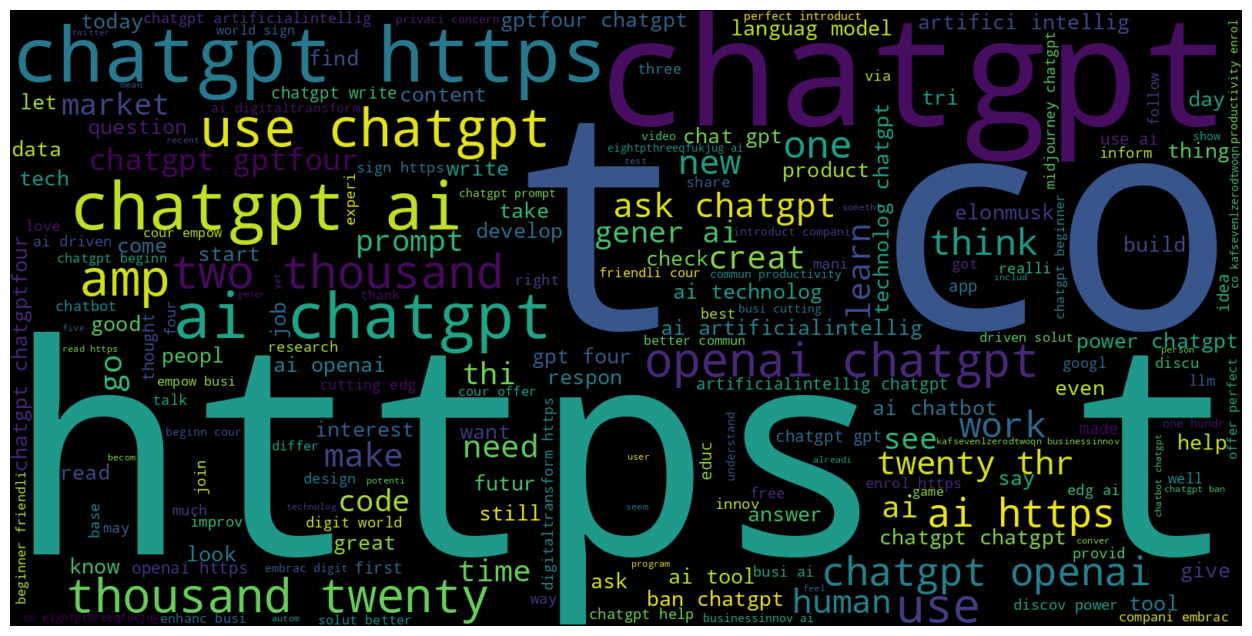

In [ ]:
# Generar un reporte exploratorio automático
profile = ProfileReport(data[['Tweet']], title='Reporte EDA', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

# Concatenar el texto preprocesado
text_data = ' '.join(data['Tweet'].astype(str))

# Imprimir el texto preprocesado
print(f"Tamaño del texto para WordCloud: {len(text_data)}")

# Generar la nube de palabras
wordcloud = WordCloud(width=1600, height=800).generate(text_data)

# Visualizar la nube de palabras
plt.figure(figsize=(16, 8))  # Aumentar el tamaño del gráfico
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [19]:
X_train.duplicated().sum()

211

In [20]:
# Remove duplicates from X_train
X_train_clean = X_train.drop_duplicates()

# Now, filter y_train using the same indices that were kept in X_train_clean
y_train_clean = y_train[X_train.index.isin(X_train_clean.index)]

# Verify the new shapes after removing duplicates
print(f"Shape of X_train after removing duplicates: {X_train_clean.shape}")
print(f"Shape of y_train after removing duplicates: {y_train_clean.shape}")


Shape of X_train after removing duplicates: (23763,)
Shape of y_train after removing duplicates: (23763,)


In [21]:
label_encoder = LabelEncoder()

# Fit the encoder only on y_train and transform y_train
y_train_encoded = label_encoder.fit_transform(y_train)



# Transform y_val and y_test using the same label encoder
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Get the original class labels
unique_labels = label_encoder.classes_

# Print the mapping between numeric values and original labels
for valor_numerico, etiqueta_original in enumerate(unique_labels):
    print(f'Valor numérico: {valor_numerico}, Etiqueta original: {etiqueta_original}')


Valor numérico: 0, Etiqueta original: negative
Valor numérico: 1, Etiqueta original: neutral
Valor numérico: 2, Etiqueta original: positive


In [22]:
# Crear la capa de TextVectorization para tokenizar el texto
vectorize_layer = TextVectorization(
    standardize=None,  # No aplicar normalización adicional (puedes ajustar según lo que necesites)
    split="whitespace",  # Dividir el texto por espacios en blanco
    max_tokens=None,  # Puedes limitar el número máximo de tokens si es necesario
    output_mode='int',  # Convertir el texto en secuencias de enteros
    output_sequence_length=None  # Longitud de la secuencia (puedes ajustar si necesitas padding)
)

# Adaptar la capa con los datos de entrenamiento (X_train)
vectorize_layer.adapt(X_train)


In [23]:
# Aplicar la capa vectorize_layer sobre los conjuntos de entrenamiento, validación y prueba
X_train_vectorized = vectorize_layer(X_train)
X_val_vectorized = vectorize_layer(X_val)
X_test_vectorized = vectorize_layer(X_test)

row_index = 8010
print("Texto original en X_train:", X_train.iloc[row_index], end="\n")
print("Texto tokenizado en X_train_vectorized:", X_train_vectorized[row_index])


Texto original en X_train: ai text gener key unlock limitless write creativ https//t.co/rqxutukbub #emergingtech #ai #chatgpt #technolog #gptfour #innov #textgener #artificialintellig #coruz
Texto tokenizado en X_train_vectorized: tf.Tensor(
[   4  215   16  393  512 2116   25  247 6645 1231    3    2   50   15
  192 2157    8 1532    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0], shape=(69,), dtype=int64)


In [24]:
print("Vocabulario:", vectorize_layer.get_vocabulary())

Vocabulario: ['', '[UNK]', '#chatgpt', '#ai', 'ai', 'chatgpt', 'use', '#openai', '#artificialintellig', 'hundr', 'like', '&amp', 'thousand', 'ask', 'one', '#gptfour', 'gener', 'new', 'the', 'two', 'make', 'get', 'tool', 'learn', 'help', 'write', 'busi', 'prompt', 'power', 'data', 'creat', 'work', 'technolog', '#generativeai', 'ban', 'human', 'know', 'take', 'think', 'read', 'time', 'could', 'way', 'model', 'need', 'chat', 'go', 'languag', 'via', '@openai', '#technolog', 'develop', 'futur', 'would', 'world', 'see', 'itali', 'check', '#chatgptfour', 'chatbot', 'look', 'openai', 'twenty-thre', '#midjourney', 'job', 'tri', 'say', 'better', 'cours', 'want', '#machinelearn', 'intellig', 'question', 'peopl', 'gpt', '#nft', '#chatbot', 'googl', 'let', 'it', '#gpt', 'what', 'thi', 'compani', 'code', 'answer', 'how', 'good', 'first', 'even', '#googl', 'come', '#chatgpt.', 'tech', 'privaci', 'today', 'content', 'artifici', 'day', 'three', 'start', 'experi', 'discov', '...', '#bard', 'user', 'arti

In [25]:
print("Configuración:", vectorize_layer.get_config())

Configuración: {'name': 'text_vectorization', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'max_tokens': None, 'standardize': None, 'split': 'whitespace', 'ngrams': None, 'output_mode': 'int', 'output_sequence_length': None, 'pad_to_max_tokens': False, 'sparse': False, 'ragged': False, 'vocabulary': None, 'idf_weights': None, 'encoding': 'utf-8', 'vocabulary_size': 64526}


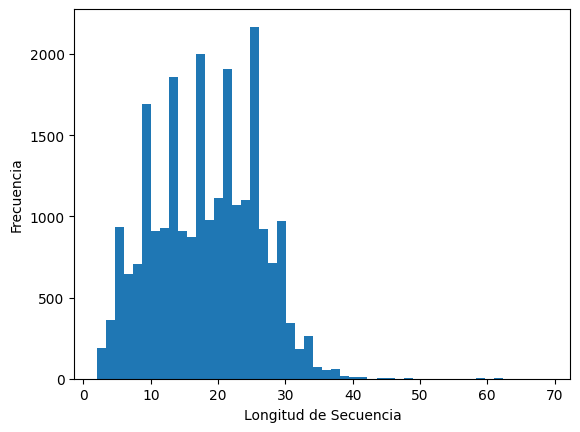

In [26]:
sequence_lengths = [len(text.split()) for text in X_train]
plt.hist(sequence_lengths, bins=50)
plt.xlabel('Longitud de Secuencia')
plt.ylabel('Frecuencia')
plt.show()

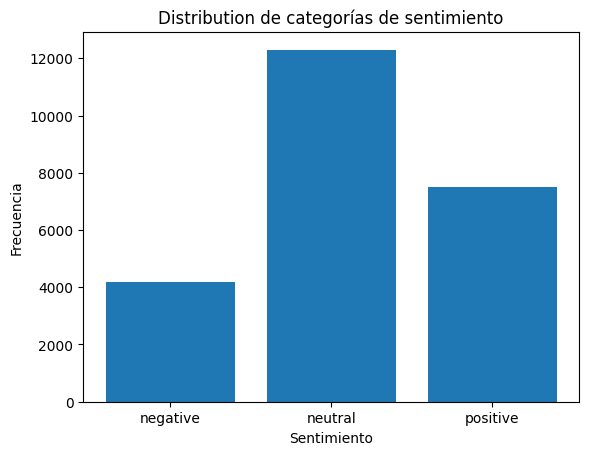

In [27]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.title('Distribution de categorías de sentimiento')
plt.show()

Modelo

In [28]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=4),
    # tf.keras.callbacks.TensorBoard(log_dir='/content/logs'),
]

In [29]:
#Modelo base
vocab_size = vectorize_layer.vocabulary_size()  # Adjust this line as needed

#Modelo base
def create_base_model():
    model = Sequential()
    model.add(vectorize_layer)  # Tokenizar texto
    model.add(Embedding(input_dim=vocab_size, output_dim=300, name="Capa_Embedding"))  # Embedding layer
    model.add(GRU(300, dropout=0.4, recurrent_dropout=0.3, return_sequences=True))
    model.add(GRU(300, dropout=0.4, recurrent_dropout=0.3))  # ültimo estado salida
    model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax', name="Capa_Salida"))  # 3 tipos de sentimeinto
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
base_model = create_base_model()
history_base = base_model.fit(X_train, y_train_encoded, epochs=20, validation_data=(X_val, y_val_encoded), batch_size=32, callbacks=my_callbacks)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 552s 725ms/step - accuracy: 0.4993 - loss: 5.6615 - val_accuracy: 0.5130 - val_loss: 1.8223
Epoch 2/20
282/750 ━━━━━━━━━━━━━━━━━━━━ 5:43 733ms/step - accuracy: 0.5057 - loss: 2.0210

In [ ]:
plt.plot(history_base.history['loss'], label='Train')
plt.plot(history_base.history['val_loss'], label='Val')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(history_base.history['accuracy'], label='Train')
plt.plot(history_base.history['val_accuracy'], label='Val')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = base_model.predict(X_train)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_train_encoded, y_pred))

In [ ]:
y_pred_test = base_model.predict(X_test)
y_pred_test = np.argmax(y_pred_test, axis=1)

print(classification_report(y_test_encoded, y_pred_test))

In [ ]:
def build_model(hp):
    model = Sequential()

    # Embedding layer with hyperparameters
    embedding_dim = hp.Choice('embedding_dim', values=[100, 200, 300], default=300)
    model.add(vectorize_layer)  # Use the TextVectorization layer defined earlier
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, name="Capa_Embedding"))

    # Primera capa GRU con return_sequences=True para pasar secuencias completas
    gru_units = hp.Int('gru_units', min_value=100, max_value=300, step=50)
    model.add(GRU(units=gru_units,
                  dropout=hp.Float('gru_dropout', 0.3, 0.5),
                  recurrent_dropout=hp.Float('gru_recurrent_dropout', 0.2, 0.4),
                  return_sequences=True))

    # Segunda capa GRU con return_sequences=False para salida de una secuencia
    model.add(GRU(units=gru_units,
                  dropout=hp.Float('gru_dropout', 0.3, 0.5),
                  recurrent_dropout=hp.Float('gru_recurrent_dropout', 0.2, 0.4)))

    # Capa Densa con unidades y dropout como hiperparámetros
    dense_units = hp.Int('dense_units', min_value=128, max_value=512, step=128)
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(hp.Float('dense_dropout', 0.2, 0.5)))

    # Capa de salida para clasificación (3 clases)
    model.add(Dense(3, activation='softmax'))  # 3 clases para sentimiento

    # Compilar el modelo con tasa de aprendizaje ajustable
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Configuración de Keras Tuner para búsqueda de hiperparámetros
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',  # Optimiza precisión en validación
    max_trials=10,  # combinaciones de hiperparámetros a probar
    executions_per_trial=2,  # ejecuciones para cada combinación
    directory='hyperparameter_tuning',  # Directorio para guardar registros
    project_name='sentiment_analysis_tuning'
)

# Ejecutar la búsqueda de hiperparámetros
tuner.search(X_train, y_train_encoded, epochs=20, validation_data=(X_val, y_val_encoded), batch_size=32, callbacks=my_callbacks)


In [110]:
import shutil
shutil.rmtree('hyperparameter_tuning/sentiment_analysis_tuning/')

In [ ]:
tuner_results = []

for trial in tuner.oracle.get_best_trials(num_trials=10):  # Adjust as needed
    trial_data = {
        'embedding_dim': trial.hyperparameters.get('embedding_dim'),
        'lstm_units': trial.hyperparameters.get('lstm_units'),
        'lstm_dropout': trial.hyperparameters.get('lstm_dropout'),
        'dense_units': trial.hyperparameters.get('dense_units'),
        'dense_dropout': trial.hyperparameters.get('dense_dropout'),
        'learning_rate': trial.hyperparameters.get('learning_rate'),
        # Retrieve last validation accuracy, default to `accuracy` if unavailable
        'val_accuracy': trial.metrics.get_last_value('val_accuracy') if 'val_accuracy' in trial.metrics.metrics else trial.metrics.get_last_value('accuracy'),
        # Retrieve last validation loss
        'val_loss': trial.metrics.get_last_value('val_loss')
    }
    tuner_results.append(trial_data)

# Create DataFrame to display results
results_df = pd.DataFrame(tuner_results)
print("Hyperparameter Tuning Results:")
print(results_df)

In [ ]:
# Obtener el mejor modelo del tuner
best_model = tuner.get_best_models(num_models=1)[0]

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir a etiquetas predichas

# Generar y mostrar el informe de clasificación
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_classes))

Glove

In [88]:
# Step 1: Load GloVe embeddings and create the embedding matrix
glove_embeddings = {}
embedding_dim = 100  # Match dimension of GloVe file (e.g., 100 for glove.6B.100d.txt)
glove_path = 'glove.6B.100d.txt'  # Path to GloVe file

# Load GloVe vectors into a dictionary
with open(glove_path, 'r', encoding='utf-8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        glove_embeddings[word] = vector

# Step 2: Create the embedding matrix using the vocabulary from the existing vectorize_layer
num_words = len(vectorize_layer.get_vocabulary()) + 1  # Including OOV token
embedding_matrix = np.zeros((num_words, embedding_dim))

# Populate the embedding matrix with GloVe embeddings for the vocabulary
word_index = dict(zip(vectorize_layer.get_vocabulary(), range(num_words)))
for word, i in word_index.items():
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [89]:
# Step 3: Define the model using the existing vectorize_layer and GloVe embeddings
def create_model_with_glove(embedding_matrix):
    model = Sequential()

    # Add the already adapted TextVectorization layer as the first layer
    model.add(vectorize_layer)

    # Capa de Embedding con GloVe y Fine-Tuning activado
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0],
        output_dim=embedding_matrix.shape[1],
        embeddings_initializer=Constant(embedding_matrix),
        trainable=True  # Permitir el ajuste de los embeddings de GloVe
    ))

    # Capa LSTM o GRU adicional con Dropout
    model.add(GRU(256, dropout=0.4, recurrent_dropout=0.3, return_sequences=True))
    model.add(GRU(256, dropout=0.4, recurrent_dropout=0.3))

    # Capas densas con regularización L2
    model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))

    # Capa de salida
    model.add(Dense(3, activation='softmax'))

    # Compilar el modelo con una tasa de aprendizaje más baja
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create and compile the model
final_model = create_model_with_glove(embedding_matrix)

In [90]:
# Step 5: Train the model
history_glove = final_model.fit(
    X_train, y_train_encoded,  # Use raw text for X_train, as vectorize_layer will handle tokenization
    validation_data=(X_val, y_val_encoded),
    epochs=20,
    batch_size=32,
    callbacks=my_callbacks
)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.5311 - loss: 0.9784 - val_accuracy: 0.5979 - val_loss: 0.8551
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.5812 - loss: 0.8885 - val_accuracy: 0.6201 - val_loss: 0.8227
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.6060 - loss: 0.8624 - val_accuracy: 0.6308 - val_loss: 0.8090
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.6193 - loss: 0.8391 - val_accuracy: 0.6498 - val_loss: 0.7805


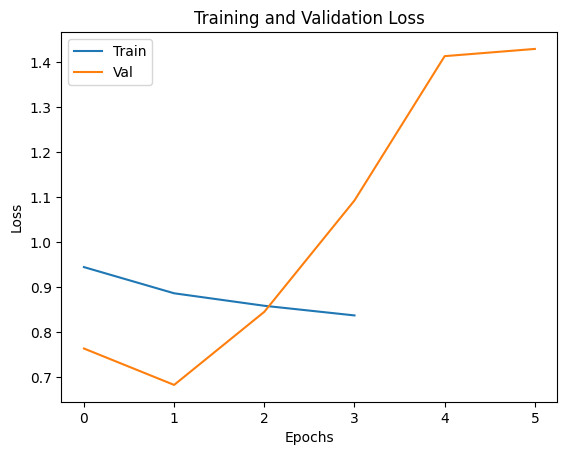

In [91]:
plt.plot(history_glove.history['loss'], label='Train')
plt.plot(history_glove.history['val_loss'], label='Val')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

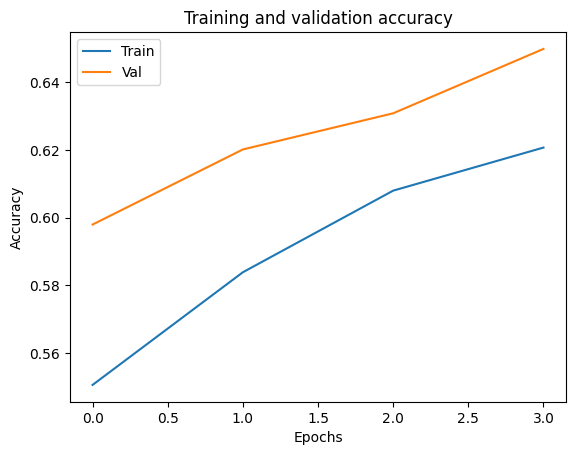

In [92]:
plt.plot(history_glove.history['accuracy'], label='Train')
plt.plot(history_glove.history['val_accuracy'], label='Val')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [97]:
y_pred_glove = final_model.predict(X_train)
y_pred_glove = np.argmax(y_pred_glove, axis=1)

print(classification_report(y_train_encoded, y_pred))

750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4184
           1       1.00      1.00      1.00     12299
           2       1.00      1.00      1.00      7491

    accuracy                           1.00     23974
   macro avg       1.00      1.00      1.00     23974
weighted avg       1.00      1.00      1.00     23974



In [98]:
y_pred_glove_t = final_model.predict(X_test)
y_pred_glove_t = np.argmax(y_pred_glove_t, axis=1)

print(classification_report(y_test_encoded, y_pred_glove_t))

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
              precision    recall  f1-score   support

           0       0.61      0.23      0.33      1307
           1       0.65      0.81      0.72      3844
           2       0.68      0.64      0.66      2341

    accuracy                           0.65      7492
   macro avg       0.65      0.56      0.57      7492
weighted avg       0.65      0.65      0.63      7492



In [ ]:
y_pred_test = final_model.predict(X_test)
y_pred_test = np.argmax(y_pred_test, axis=1)

print(classification_report(y_test_encoded, y_pred_test))

In [ ]:
def build_model_glove(hp):
    model = Sequential()

    # TextVectorization layer - ensure it's the first layer
    model.add(vectorize_layer)  # This layer converts raw text to integer sequences

    # GloVe Embedding layer
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0],
        output_dim=embedding_matrix.shape[1],
        embeddings_initializer=Constant(embedding_matrix),
        trainable=False  # Set to True if you want to fine-tune
    ))

    # LSTM layer with hyperparameters
    lstm_units = hp.Int('lstm_units', min_value=100, max_value=300, step=50)
    model.add(Bidirectional(LSTM(units=lstm_units, dropout=hp.Float('lstm_dropout', 0.2, 0.5), recurrent_dropout=0.3)))

    # Dense layer with hyperparameters
    dense_units = hp.Int('dense_units', min_value=128, max_value=512, step=128)
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(hp.Float('dense_dropout', 0.2, 0.5)))

    # Output layer for classification (e.g., 3 classes)
    model.add(Dense(3, activation='softmax'))

    # Compile with tunable learning rate
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
tuner_glove.search(
    X_train, y_train_encoded,  # Raw text input and integer labels
    epochs=10,
    validation_data=(X_val, y_val_encoded),
    batch_size=32,
    callbacks=my_callbacks
)

Trial 10 Complete [00h 06m 57s]
val_accuracy: 0.6772606074810028

Best val_accuracy So Far: 0.6968635320663452
Total elapsed time: 01h 27m 35s


In [ ]:
tuner_results_glove = []

# Extract the top 10 trials (adjust as needed)
for trial in tuner_glove.oracle.get_best_trials(num_trials=10):
    trial_data = {
        'lstm_units': trial.hyperparameters.get('lstm_units'),  # LSTM units
        'lstm_dropout': trial.hyperparameters.get('lstm_dropout'),  # LSTM dropout
        'dense_units': trial.hyperparameters.get('dense_units'),  # Dense units
        'dense_dropout': trial.hyperparameters.get('dense_dropout'),  # Dense dropout
        'learning_rate': trial.hyperparameters.get('learning_rate'),  # Learning rate
        # Retrieve last validation accuracy; set to 0.0 if unavailable
        'val_accuracy': trial.metrics.get_last_value('val_accuracy') if 'val_accuracy' in trial.metrics.metrics else 0.0
    }
    tuner_results_glove.append(trial_data)

# Convert the results to a DataFrame for easier viewing
results_df = pd.DataFrame(tuner_results_glove)
print("Hyperparameter Tuning Results:")
print(results_df)


Hyperparameter Tuning Results:
   lstm_units  lstm_dropout  dense_units  dense_dropout  learning_rate  \
0         150      0.275323          128       0.490696         0.0010   
1         150      0.360411          384       0.227319         0.0010   
2         150      0.211007          384       0.416823         0.0100   
3         150      0.207274          384       0.344989         0.0001   
4         250      0.480887          256       0.271617         0.0001   
5         200      0.481870          256       0.317806         0.0001   
6         200      0.411186          256       0.340507         0.0001   
7         100      0.236780          512       0.348431         0.0010   
8         250      0.298731          256       0.420238         0.0100   
9         250      0.408120          256       0.473348         0.0010   

   val_accuracy  
0      0.696864  
1      0.694695  
2      0.677261  
3      0.654071  
4      0.643477  
5      0.634635  
6      0.000000  
7      0.0

In [ ]:
print(type(y_train), y_train.dtype)
print(type(y_val), y_val.dtype)

<class 'pandas.core.series.Series'> object
<class 'pandas.core.series.Series'> object


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
with tf.device('/device:GPU:0'):
  history = model.fit(
      X_train_tf, y_train_tf,
      validation_data = (X_val_tf, y_val_tf),
      epochs=20,
      callbacks=my_callbacks)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 42ms/step - accuracy: 0.5651 - loss: 0.9580 - val_accuracy: 0.6513 - val_loss: 0.7982
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.6953 - loss: 0.7296 - val_accuracy: 0.7090 - val_loss: 0.6892
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.7811 - loss: 0.5482 - val_accuracy: 0.7279 - val_loss: 0.6574
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.8457 - loss: 0.3942 - val_accuracy: 0.7274 - val_loss: 0.7141
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.8870 - loss: 0.2941 - val_accuracy: 0.7199 - val_loss: 0.8183
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.9088 - loss: 0.2316 - val_accuracy: 0.7064 - val_loss: 0.8662
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.9359 - loss: 0.1749 - val_accuracy: 0.7012 - val_loss: 1.0852


In [ ]:
y_pred = model.predict(X_train_tf)
y_pred = np.argmax(y_pred, axis=1)
y_pred


750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step


array([0, 2, 1, ..., 1, 0, 1])

In [ ]:
print(classification_report(y_train_tf, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4184
           1       0.97      0.95      0.96     12299
           2       0.93      0.98      0.96      7491

    accuracy                           0.96     23974
   macro avg       0.95      0.95      0.95     23974
weighted avg       0.96      0.96      0.96     23974



In [ ]:
y_pred_test = model.predict(X_test_tf)
y_pred_test = np.argmax(y_pred_test, axis=1)

print(classification_report(y_test_tf, y_pred_test))

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
              precision    recall  f1-score   support

           0       0.60      0.59      0.60      1307
           1       0.77      0.71      0.74      3844
           2       0.68      0.77      0.72      2341

    accuracy                           0.71      7492
   macro avg       0.68      0.69      0.69      7492
weighted avg       0.71      0.71      0.71      7492

